In [1]:
pdf_path = "report.pdf"

In [2]:
import fitz
from tqdm.auto import tqdm
def text_formatter(text:str)->str:
    cleaned_text = text.replace("\n"," ").strip()
    return cleaned_text 

def open_and_read_pdf(pdf_path:str)->list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_text = []
    for page_numbers, page in tqdm(enumerate(doc)):
        text = page.get_text() 
        text = text_formatter(text = text)
        pages_and_text.append({"page_number":page_numbers - 9,
                               "page_char_count":len(text),
                               "page_word_count":len(text.split(" ")),
                               "page_sentence_count_raw":len(text.split(". ")),
                               "page_token_count":len(text)/4,
                               "text":text
                               })
    return pages_and_text
pages_and_texts = open_and_read_pdf(pdf_path = pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -9,
  'page_char_count': 4018,
  'page_word_count': 684,
  'page_sentence_count_raw': 25,
  'page_token_count': 1004.5,
  'text': 'ICAR-CRIDA Annual Report 2022 xv Executive Summary Executive Summary During the year 2022, various experiments were  conducted under Institute, National Innovations in  Climate Resilient Agriculture (NICRA) and externally  funded projects. There were also outreach programmes  such as Farmer First Programme (FFP), Schedule  Caste Sub Programme (SCSP), Tribal Sub Plan (TSP)  and CRIDA-KVK activities in Ranga Reddy district,  Telangana. The achievements of all the above activities  and others are briefly highlighted below. Resource characterization •  The district-based contingency plans (DACP)  were prepared for 648 districts in the country and  hosted on ICAR/DAC websites (http://agricoop. nic.in/acp. html, http://www.icar-crida.res.in/) and  circulated to all state agriculture departments. A  total of 514 DACPs have been updated till now. •

In [3]:
import random
random.sample(pages_and_texts, k = 3 )

[{'page_number': 79,
  'page_char_count': 2387,
  'page_word_count': 394,
  'page_sentence_count_raw': 13,
  'page_token_count': 596.75,
  'text': 'ICAR-CRIDA Annual Report 2022 79 Coordinated / Network Projects 4 4.1. All India Coordinated Research Project  for Dryland Agriculture (AICRPDA) The All India Coordinated Research Project for  Dryland Agriculture (AICRPDA) has the mandate to  generate agro-ecology specific technologies through on- station in the thematic areas of rainwater management,  cropping systems, nutrient management, energy  management, alternate land use and integrated farming  systems.  On-farm research (OFR) focus on rainfed  IFS research  and technology assessment/refinement.  AICRPDA has a network of 28 centers located in  diverse rainfed agro-ecologies in the country. Under  NICRA, resilient practices and real-time contingency  measures are being demonstrated in the farmers’ fields.  The salient achievements are given below. During 2021- 22, 189 on-station expe

In [4]:
import pandas as pd 
df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-9,4018,684,25,1004.50,ICAR-CRIDA Annual Report 2022 xv Executive Sum...
1,-8,4269,737,24,1067.25,ICAR-CRIDA Annual Report 2022 xvi • The moist...
2,-7,4147,732,26,1036.75,ICAR-CRIDA Annual Report 2022 xvii under diffe...
3,-6,4243,715,20,1060.75,ICAR-CRIDA Annual Report 2022 xviii • Product...
4,-5,4284,770,23,1071.00,ICAR-CRIDA Annual Report 2022 xix • At Indore...


In [5]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,164.00,164.00,164.00,164.00,164.00
mean,72.50,2786.90,462.49,26.30,696.73
std,47.49,1028.59,170.98,22.15,257.15
min,-9.00,0.00,1.00,1.00,0.00
25%,31.75,2166.50,362.75,13.00,541.62
50%,72.50,2694.00,453.50,19.50,673.50
75%,113.25,3431.25,579.75,29.00,857.81
max,154.00,5081.00,857.00,105.00,1270.25


In [6]:
from spacy.lang.en import English
nlp = English()
nlp.add_pipe('sentencizer')
doc = nlp("this is a sentence. This another sentence. I like elephants.")
assert len(list(doc.sents)) == 3
list(doc.sents)


[this is a sentence., This another sentence., I like elephants.]

In [7]:
for item in tqdm(pages_and_texts):
    item['sentences'] = list(nlp(item["text"]).sents)
    item['sentences'] = [str(sentences) for sentences in item['sentences']]
    item['page_sentences_count_spacy'] = len(item["sentences"])

  0%|          | 0/164 [00:00<?, ?it/s]

In [8]:
random.sample(pages_and_texts, k = 1)

[{'page_number': 124,
  'page_char_count': 2621,
  'page_word_count': 457,
  'page_sentence_count_raw': 60,
  'page_token_count': 655.25,
  'text': 'ICAR-CRIDA Annual Report 2022 124 S.  No. Institute  code no Title of the Project Investigators Year of Start-Close 10 RM/NM/35 Estimating  the  carbon  sequestration  potential of semiarid soils using carbon  saturation concept K. Srinivas , A.K. Indoria & S.S.  Balloli 2018-23 11 RM/SS/53 Characterizing preferential flow in soils of  semiarid Telangana Pushpanjali, G. Ravindra Chary,  K. Sammi Reddy, K.L. Sharma,  K.S. Reddy, Manoranjan Kumar,  Dhimate Ashish Satish &   N. Ravi Kumar 2019-23 12 NRMACRIDASIL  202200500005 Evaluation of natural farming practices to  sustain soil health and crop productivity in  rainfed areas Pushpanjali, K. Sammi Reddy, S.  Kundu, M. Manjunath,   P.K. Pankaj, K.S. Reddy,   Josily Samuel, A.G. Reddy &   V.K. Singh 2022-26 13 RM/RM/53 Soil water dynamics in raised bed with  modified furrow system and supplem

In [9]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentences_count_spacy
count,164.00,164.00,164.00,164.00,164.00,164.00
mean,72.50,2786.90,462.49,26.30,696.73,18.73
std,47.49,1028.59,170.98,22.15,257.15,14.63
min,-9.00,0.00,1.00,1.00,0.00,0.00
25%,31.75,2166.50,362.75,13.00,541.62,10.00
50%,72.50,2694.00,453.50,19.50,673.50,15.00
75%,113.25,3431.25,579.75,29.00,857.81,24.00
max,154.00,5081.00,857.00,105.00,1270.25,74.00


In [10]:
num_sentence_chunk_size = 10
def split_list(input_list : list[str],
               slice_size: int = num_sentence_chunk_size)-> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0,len(input_list),slice_size)]

test_list = list(range(25))
split_list(test_list)
    
    

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [11]:
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list = item['sentences'],slice_size = num_sentence_chunk_size)
    item['num_chunks'] = len(item["sentence_chunks"])

  0%|          | 0/164 [00:00<?, ?it/s]

In [12]:
random.sample(pages_and_texts, k = 3)

[{'page_number': 106,
  'page_char_count': 2816,
  'page_word_count': 460,
  'page_sentence_count_raw': 25,
  'page_token_count': 704.0,
  'text': 'ICAR-CRIDA Annual Report 2022 106 Dr. M. Srinivasa Rao, awarded Fellow of Telangana  Academy of Sciences (TAS), April 2022 Dr. Pushpanjali received the best oral presentation in  National Seminar on “Managing Soils in a Changing  Climate” held at ICAR-NBSS&LUP Campus, Nagpur  during March 24-26, 2022 on “A systematic approach  to study soil preferential flow in semi-arid India”. Dr. Santhosh H B  received the Best Oral Presentation  Award for presentation on ‘Samrat Bt – a new, early  maturing Bt cotton variety for stress resilience and  multiple cropping in rainfed agro-ecologies of south  India’ in International Conference on Reimagining  Rainfed Agro-ecosystems: Challenges & Opportunities  held at ICAR-CRIDA, Hyderabad during 22-24,  December, 2022. Dr. Sarath Chandran, M.A  received the best oral  presentation award for presentation on 

In [13]:
df =pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentences_count_spacy,num_chunks
count,164.00,164.00,164.00,164.00,164.00,164.00,164.00
mean,72.50,2786.90,462.49,26.30,696.73,18.73,2.35
std,47.49,1028.59,170.98,22.15,257.15,14.63,1.47
min,-9.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,31.75,2166.50,362.75,13.00,541.62,10.00,1.00
50%,72.50,2694.00,453.50,19.50,673.50,15.00,2.00
75%,113.25,3431.25,579.75,29.00,857.81,24.00,3.00
max,154.00,5081.00,857.00,105.00,1270.25,74.00,8.00


In [14]:
import re 
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item['sentence_chunks']:
        chunk_dict = {}
        chunk_dict["page_number"] = item['page_number']
        
        joined_sentence_chunks = "".join(sentence_chunk).replace(" "," ").strip()
        joined_sentence_chunks = re.sub(r'\.([A-Z])',r'. \1',joined_sentence_chunks)
        
        chunk_dict["sentence_chunks"] = joined_sentence_chunks
        
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunks)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunks.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunks) / 4
        
        pages_and_chunks.append(chunk_dict)
        
len(pages_and_chunks)

  0%|          | 0/164 [00:00<?, ?it/s]

386

In [15]:
random.sample(pages_and_chunks,k = 1)

[{'page_number': 123,
  'sentence_chunks': 'ICAR-CRIDA Annual Report 2022 123 Ongoing Projects- 2022 11 S.  No. Institute  code no Title of the Project Investigators Year of Start-Close Division of Resource Management Institute Projects 1 RM/AF/58 Evaluation of multipurpose tree species  based agroforestry systems G. Venkatesh, G. Ravindra Chary,  K. A. Gopinath, J. V. N. S. Prasad, K.  Sammi Reddy, I. Srinivas,   K. V. Rao, Basudeb Sarkar,   Arun Kumar Shanker,   D. B. V. Ramana, B. M. K. Raju &  K. B. Sridhar 2019-25 2 RM/AF/59 Evaluation of bamboo species suitable for  Southern Telangana region G. Venkatesh, K. Sammi Reddy,  K. A. Gopinath & V. K. Singh 2021-23 3 RM/FM/39 Development and performance evaluation  of self-propelled reaper for harvesting of  short and bushy crops. Dhimate Ashish Satish,   I. Srinivas, R. V. Adake, B.  Sanjeeva Reddy & G. Pratibha 2018-21 4 RM/FM/49 Development  of  solar  powered  mechanization package for small farm  holders in rainfed system R. V. Ada

In [16]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,386.00,386.00,386.00,386.00
mean,73.84,1182.98,195.98,295.75
std,45.96,645.33,110.63,161.33
min,-9.00,3.00,1.00,0.75
25%,32.00,681.50,110.50,170.38
50%,77.50,1107.50,184.50,276.88
75%,114.00,1614.50,268.75,403.62
max,152.00,2819.00,507.00,704.75


In [17]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'chunk token count: {row[1]["chunk_token_count"]} | Text : {row[1]["sentence_chunks"]}')

chunk token count: 13.0 | Text : Horticulture crop before and after machine operation
chunk token count: 26.75 | Text : villages No of Farmers  benefitted  and cards distributed 118 - 2 95 Participants of the training programme
chunk token count: 13.25 | Text : Distribution and release of fingerlings to SC farmers
chunk token count: 24.0 | Text : Microbial Enzymes  Involved in Lignin Transformation. Food and Scientific  Reports 3(12): 45-50.
chunk token count: 0.75 | Text : The


In [18]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient = "records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -9,
  'sentence_chunks': 'ICAR-CRIDA Annual Report 2022 xv Executive Summary Executive Summary During the year 2022, various experiments were  conducted under Institute, National Innovations in  Climate Resilient Agriculture (NICRA) and externally  funded projects. There were also outreach programmes  such as Farmer First Programme (FFP), Schedule  Caste Sub Programme (SCSP), Tribal Sub Plan (TSP)  and CRIDA-KVK activities in Ranga Reddy district,  Telangana. The achievements of all the above activities  and others are briefly highlighted below. Resource characterization •  The district-based contingency plans (DACP)  were prepared for 648 districts in the country and  hosted on ICAR/DAC websites (http://agricoop.nic.in/acp.html, http://www.icar-crida.res.in/) and  circulated to all state agriculture departments. A  total of 514 DACPs have been updated till now. • Groundwater recharge prospect was estimated  qualitatively at the district level based on the  weekly rain

In [19]:
random.sample(pages_and_chunks_over_min_token_len, k = 1)

[{'page_number': 108,
  'sentence_chunks': '36(1): 13-16  Barikara Umesh, Reddy, K S,  Polisgowdar, B. S.,  Maruthi,  V,  Satishkumar,  U.,  Ayyanagoudar,  Sathyanarayan Rao, M. S., and Veeresh, H. 2022. Assessment of climate change impact on maize (zea  mays l.) through aquacrop model in semi-arid alfisol  of southern Telangana. Agricultural Water Management,  107950.doi: 10.1016/j.agwat.2022.107950, Publications 10',
  'chunk_char_count': 376,
  'chunk_word_count': 60,
  'chunk_token_count': 94.0}]

In [26]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2",device="cuda")
sentences = ["the sentence transformer library creates an easy way to create embeddings",
             "sentence can be embedded one by one in a list",
             "I like horses!"]
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences,embeddings))
for sentence , embedding in embeddings_dict.items():
    print(f"Sentence: {sentences}")
    print(f"Embedding: {embedding}")
    print(" ")


AssertionError: Torch not compiled with CUDA enabled

In [23]:
embeddings[0].shape

NameError: name 'embeddings' is not defined

In [24]:
%%time 

embedding_model.to("cpu")
for item in tqdm(pages_and_chunks_over_min_token_len):
    item['embedding'] = embedding_model.encode(item["sentence_chunks"])

NameError: name 'embedding_model' is not defined

In [25]:
%%time 

embedding_model.to("cuda")
for item in tqdm(pages_and_chunks_over_min_token_len):
    item['embedding'] = embedding_model.encode(item["sentence_chunks"])

NameError: name 'embedding_model' is not defined

In [ ]:
%%time

text_chunks = [item["sentence_chunks"] for item in pages_and_chunks_over_min_token_len]
text_chunks[40]

CPU times: total: 0 ns
Wall time: 0 ns


'A total of 514 DACPs have been  updated till now. During the year 2022, following the forecast of India  Meteorological Department (during April and May)  and SASCOF (during April), from above normal  rainfall condition to normal condition, interface  meetings were organised across six states (Rajasthan,  Maharashtra, Jharkhand, Gujarat, Telangana and  Karnataka) during the season. During the season, normal to above normal monsoon  was witnessed in many states, deficient to large deficient  monsoon was observed in states of Uttar Pradesh,  Bihar, Jharkhand, West Bengal and parts of North East  Region. However, these states received above normal  rainfall during the months of October to December  in large number of districts facilitating better rabi  prospects. Since the commencement of organization of  interface meetings for operationalization of contingency  plans from 2014, a total of 61 meetings were held across  different states. 2.2.4. Groundwater recharge prospects The rainfall 

In [ ]:
len(text_chunks)

372

In [ ]:
%%time

text_chunks_embeddings = embedding_model.encode(text_chunks, batch_size = 16,convert_to_tensor=True).to("cuda")
text_chunks_embeddings

CPU times: total: 906 ms
Wall time: 1.32 s


tensor([[-0.0698, -0.0051, -0.0176,  ...,  0.0354, -0.0848, -0.0246],
        [-0.0105, -0.0084,  0.1169,  ..., -0.0013, -0.1019, -0.0082],
        [ 0.0235,  0.0007,  0.0192,  ..., -0.0577, -0.0729, -0.0734],
        ...,
        [-0.1105, -0.0211,  0.0097,  ..., -0.0708, -0.0258, -0.0541],
        [-0.0874,  0.0169, -0.0338,  ..., -0.0302, -0.0689,  0.0232],
        [-0.0647,  0.0041, -0.0143,  ..., -0.0379, -0.0454,  0.0194]],
       device='cuda:0')

In [ ]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index = False)


In [ ]:
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunks,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-9,ICAR-CRIDA Annual Report 2022 xv Executive Sum...,1409,221,352.25,[-6.97960779e-02 -5.08253928e-03 -1.76422391e-...
1,-9,"Parts of central India and states covering UP,...",2216,381,554.00,[-1.05084665e-02 -8.38922709e-03 1.16850227e-...
2,-9,•\t The population of free-living nitrogen fix...,384,66,96.00,[ 2.34800242e-02 7.01835845e-04 1.92060769e-...
3,-8,ICAR-CRIDA Annual Report 2022 xvi •\t The mois...,2290,388,572.50,[-3.59304026e-02 2.44139340e-02 -6.83409944e-...
4,-8,"During this year, field experiment on the addi...",1248,207,312.00,[-1.51402205e-02 3.83526310e-02 4.64082249e-...


In [ ]:
import random
import torch 
import numpy as np 
import pandas as pd

text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df['embedding'].apply(lambda x: np.fromstring(x.strip("[]"),sep =" "))

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df['embedding'].tolist(),axis = 0),dtype = torch.float32).to("cuda")

pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient = "records")
text_chunks_and_embeddings_df

,page_number,sentence_chunks,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-9,ICAR-CRIDA Annual Report 2022 xv Executive Sum...,1409,221,352.25,"[-0.0697960779, -0.00508253928, -0.0176422391,..."
1,-9,"Parts of central India and states covering UP,...",2216,381,554.00,"[-0.0105084665, -0.00838922709, 0.116850227, 0..."
2,-9,•\t The population of free-living nitrogen fix...,384,66,96.00,"[0.0234800242, 0.000701835845, 0.0192060769, -..."
3,-8,ICAR-CRIDA Annual Report 2022 xvi •\t The mois...,2290,388,572.50,"[-0.0359304026, 0.024413934, -0.0683409944, 0...."
4,-8,"During this year, field experiment on the addi...",1248,207,312.00,"[-0.0151402205, 0.038352631, 0.0464082249, -0...."
...,...,...,...,...,...,...
367,151,S. Vijaya Kumar Assistant Chief Technical Offi...,588,78,147.00,"[-0.104223445, 0.00498899259, 0.00819034129, -..."
368,151,Avula Lalitha Skilled Support Staff Smt. N. La...,532,74,133.00,"[-0.0479054265, -0.0663089603, 0.0252847578, -..."
369,152,ICAR-CRIDA Annual Report 2022 152 Institute Wo...,1074,156,268.50,"[-0.110455707, -0.0210888591, 0.00971281715, 0..."
370,152,Sushil Kumar Singh Chief Administrative Office...,391,59,97.75,"[-0.0873966366, 0.0168715492, -0.0338428617, 0..."


In [ ]:
embeddings.shape

torch.Size([372, 384])

In [ ]:
from sentence_transformers import util , SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2",device = "cuda")

d:\Project tutorial\project\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
query = " Climate  Change  Research  Complex "
print(f"Query: {query}")

query_embedding = embedding_model.encode(query, convert_to_tensor = True).to("cuda")

from time import perf_counter as timer
start_time = timer()
dot_score = util.dot_score(a = query_embedding, b = embeddings)[0]
end_time = timer()

print(f"[INFO] time taken to get scores on {len(embedding)} embedding: {end_time - start_time: .5f}seconds.")

top_results_dot_product = torch.topk(dot_score, k = 5)
top_results_dot_product
 

Query:  Climate  Change  Research  Complex 
[INFO] time taken to get scores on 384 embedding:  0.00195seconds.


torch.return_types.topk(
values=tensor([0.5931, 0.5358, 0.5067, 0.5019, 0.5010], device='cuda:0'),
indices=tensor([335, 299,  24, 341, 288], device='cuda:0'))

In [ ]:
pages_and_chunks[24]

{'page_number': 3,
 'sentence_chunks': "CRIDA Annexe building  The Annexe building has the Director's office,  Prioritisation, Monitoring and Evaluation (PME) cell  and offices of administration. The unique feature of  the building is that it is built by adopting the green  building concept with lift facilities, firefighting and  alarm systems. The building also has a well-furnished  seminar hall (600 sq.mt.)with 120 seating capacity and  a spacious cafeteria. The new Annex Building fulfils  the long-cherished requirements of both the scientific  and administrative staff of ICAR-CRIDA. Conference hall in the annexe building  State of art Climate Research Facilities Climate Change Research Complex (CCRC): Free  Air Temperature Elevation (FATE) facility, Carbon  dioxide and Temperature Gradient Chamber (CTGC)  facility, Supervisory Control and Data Acquisition  (SCADA) based rainfall simulation facility and  precision lysimeters with open type climate chambers  a state of the art facilit

In [ ]:
import textwrap 

def print_wrapped(text,wrap_length = 80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrapped_text)

In [ ]:
print(f"Query: '{query}'\n")
print("results:")

for score, idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("text:")
    print(pages_and_chunks[idx]["sentence_chunks"])
    print(f"page number : {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: ' Climate  Change  Research  Complex '

results:
Score: 0.5931
text:
ICAR-CRIDA Annual Report 2022 130 Theme 4: Bio-physical and socio-economic aspects of climate resilient technologies (PI: C. A. Rama Rao) S.  No. Institute code no Title of the Project Investigators Year of Start-Close 1 NICRA/Theme  4/1 Adaptation targeting and prioritization for  climate change C A Rama Rao, B. M. K. Raju,  A. V. M. Subba Rao, K. V. Rao,   R. Nagarjuna Kumar, A.  Amarender Reddy & K. Nagasree 2021-26 2 NICRA/Theme  4/2 Assessing impact of climate change on  major rainfed crops and constructing agro- climatic analogues for adaptation B M K Raju, C. A. Rama Rao,  K. V. Rao, G. Ravindra Chary,  Dr. G. Pratibha, Josily Samuel, R.  Nagarjuna Kumar &   A. V. M. Subba Rao 2021-26 3 NICRA/Theme  4/3 Adoption dynamics and institutional  drivers for scaling out resilience enhancing  technologies K Nagasree, Jagriti Rohit, K. Ravi  Shankar, C. N. Anshida Beevi,  JVNS Prasad, B M K Raju &   C A Rama Rao 

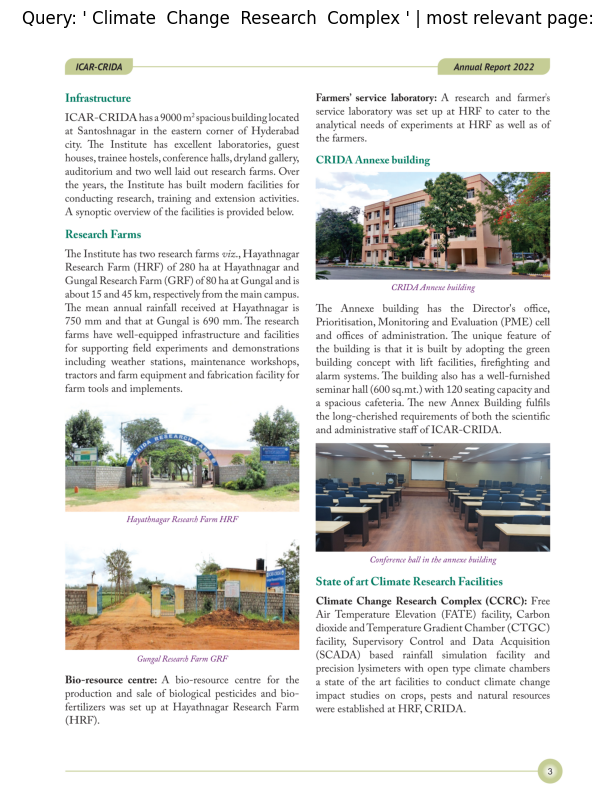

In [ ]:
import fitz

pdf_path = "report.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(3+9)

img = page.get_pixmap(dpi = 300)

doc.close()

img_array = np.frombuffer(img.samples_mv,dtype = np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt 
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | most relevant page:")
plt.axis("off")
plt.show()

In [ ]:
embeddings[0]

tensor([-6.9796e-02, -5.0825e-03, -1.7642e-02,  1.1383e-02,  1.6628e-02,
        -5.2389e-02, -4.3987e-02,  3.6767e-02, -7.6136e-02,  2.5513e-02,
        -8.6154e-02, -1.1375e-01,  5.0186e-03,  2.8341e-02, -7.6739e-02,
         6.4987e-03, -9.6917e-03, -7.2269e-02, -2.0335e-02, -7.7396e-02,
        -1.3078e-02, -2.6386e-03, -1.9732e-02, -1.0589e-01, -8.8593e-03,
         7.2125e-02, -6.1763e-03, -4.3863e-03, -5.6531e-02,  5.0846e-02,
         2.9368e-02,  8.1517e-02, -4.5774e-02, -3.0993e-03, -7.1962e-04,
         1.2161e-01,  1.4246e-02,  1.9320e-02,  3.9790e-02,  8.5114e-03,
        -1.7680e-02,  1.9904e-02,  5.5496e-04, -3.8205e-02, -3.0808e-02,
         2.1606e-02, -1.0731e-02, -2.0285e-02, -1.0760e-01, -8.2430e-02,
         6.5552e-02,  1.8584e-02,  1.0830e-02,  4.9981e-02, -5.1640e-02,
        -1.0147e-01,  9.4481e-04, -2.9125e-02, -3.2919e-02,  3.4086e-02,
        -5.2059e-03, -1.8221e-02, -7.1616e-02, -1.2722e-02,  6.9777e-02,
        -5.0019e-02, -5.9459e-02,  7.2777e-02,  4.2

In [ ]:
import torch 
def dot_product(vectro1,vector2):
    return torch.dot(vectro1,vector2)

def cosine_similarity(vector1,vector2):
    dot_product = torch.dot(vector1,vector2)
    
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))
    
    return dot_product/(norm_vector1 * norm_vector2)

vector1 = torch.tensor([1,2,3] , dtype = torch.float32)
vector2 = torch.tensor([1,2,3] , dtype = torch.float32)
vector3 = torch.tensor([4,5,6] , dtype = torch.float32)
vector4 = torch.tensor([-1,-2,-3] , dtype = torch.float32)

print("dot product between vector1 and vector2: ",dot_product(vector1,vector2))
print("dot product between vector1 and vector3: ",dot_product(vector1,vector3))
print("dot product between vector1 and vector4: ",dot_product(vector1,vector4))

print(" ")

print("cosine similarity between vector 1 and vector 2: ",cosine_similarity(vector1, vector2))
print("cosine similarity between vector 1 and vector 3: ",cosine_similarity(vector1, vector3))
print("cosine similarity between vector 1 and vector 4: ",cosine_similarity(vector1, vector4))


dot product between vector1 and vector2:  tensor(14.)
dot product between vector1 and vector3:  tensor(32.)
dot product between vector1 and vector4:  tensor(-14.)
 
cosine similarity between vector 1 and vector 2:  tensor(1.0000)
cosine similarity between vector 1 and vector 3:  tensor(0.9746)
cosine similarity between vector 1 and vector 4:  tensor(-1.0000)


In [ ]:
def retrieve_relavant_resource(query: str,
                               embeddings : torch.tensor,
                               model : SentenceTransformer = embedding_model,
                               n_resource_to_return: int = 5,
                               print_time: bool = True):
    
    query_embedding = model.encode(query,convert_to_tensor = True)
    start_time = timer()
    dot_scores = util.dot_score(query_embedding,embeddings)[0]
    end_timer = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:5f} seconds." )
    
    scores , indices = torch.topk(input=dot_scores,k = n_resource_to_return )

    return scores,indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks : list[dict]=pages_and_chunks,
                                 n_resource_to_return: int = 5):
    
    scores, indicies = retrieve_relavant_resource(query = query,
                                                  embeddings = embeddings,
                                                  n_resource_to_return = n_resource_to_return)
    
    for score, idx in zip(scores,indicies):
        print(f"Score: {score:.4f}")
        print("text:")
        print(pages_and_chunks[idx]["sentence_chunks"])
        print(f"page number : {pages_and_chunks[idx]['page_number']}")
        print("\n")
    

In [ ]:
query = "foods high in fiber"
retrieve_relavant_resource(query = query , embeddings = embeddings)
print_top_results_and_scores(query = query, embeddings = embeddings)

[INFO] Time taken to get scores on 372 embeddings: -2.152962 seconds.
[INFO] Time taken to get scores on 372 embeddings: -2.162330 seconds.
Score: 0.3507
text:
ICAR-CRIDA Annual Report 2022 60 3.1.5. Impact of eCO2 and eT on quality of crop  residues as livestock feed The projected increase in atmospheric carbon dioxide  (CO2) and climate change will have significant  impacts on future fodder quality and productivity. A  study was conducted to assess the impact of elevated  temperature and carbon dioxide on quality, and in vitro  digestibility of haulms of groundnut crop (K6 and  Narayani varieties) grown in the FATE and FACE  facility under three set of environmental conditions i.e.,  ambient temperature (aTemp), elevated temperature  (eTemp) with 3±0.5°C and combination of eTemp  and elevated CO2 of 550± 50 ppm (eCO2+ eTemp). Groundnut haulms were collected at 60 DAS in three  replications from all the treatments and analyzed for  proximate composition (organic matter, crude protein,

In [ ]:
import torch 
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/(2**30))
print(f"Available GPU memory : {gpu_memory_gb} GB")

Available GPU memory : 4 GB


In [ ]:
model_id= "google/gemma-2b-it"
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
use_quantization_config = True
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False 
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

Your available GPU memory is 4GB, you may not have enough memory to run a Gemma LLM locally without quantization.
use_quantization_config set to: True
model_id set to: google/gemma-2b-it


In [ ]:
import torch 
from transformers import AutoTokenizer , AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if(is_flash_attn_2_available() and (torch.cuda.get_device_capability(0)[0] >= 8)):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa"
model_id = "google/gemma-2b-it"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                torch_dtype = torch.float16,
                                                quantization_config = quantization_config if use_quantization_config else None,
                                                low_cpu_mem_usage = False,
                                                attn_implementation=attn_implementation)

if not use_quantization_config:
    llm_model.to("cuda")


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear4bit(in_features=16384, out_features=2048, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm()
        (post_attention_layernorm): GemmaRMSNorm()
    

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])
get_model_num_params(llm_model)

1515268096

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])
    
    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)
    
    return {"model_mem_bytes" : model_mem_bytes,
            "model_mem_mb": round(model_mem_mb,2),
            "model_mem_gb": round(model_mem_gb,2)}
    
get_model_mem_size(llm_model)
    

{'model_mem_bytes': 2039641088, 'model_mem_mb': 1945.15, 'model_mem_gb': 1.9}

### generating text with our LLM 

In [ ]:
gpt4_questions = ["What is the definition of rainfed agriculture, and why is it considered the predominant form of agriculture in India?",
                  "Which organizations, such as FAO, ICARDA, and CRIDA, have been mentioned in the context of rainfed agriculture, and what are their contributions?",
                  "What was the significance of the establishment of the All India Coordinated Research Project on Agrometeorology by ICAR in 1983?",
                  "How might climate change affect rainfed agriculture, and what measures can be taken to mitigate its effects?"]

In [ ]:
def prompt_formatter(query:str,
                     context_items: list[dict]) -> str:
    
    context = "- " + "\n- ".join([item["sentence_chunks"] for item in context_items])
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt


In [ ]:
query = random.choice(gpt4_questions)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relavant_resource(query=query,embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Which organizations, such as FAO, ICARDA, and CRIDA, have been mentioned in the context of rainfed agriculture, and what are their contributions?
[INFO] Time taken to get scores on 372 embeddings: -29.396992 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. 

In [ ]:
%%time 

input_ids = tokenizer(prompt,return_tensors="pt").to("cuda")

outputs = llm_model.generate(**input_ids,
                             temperature = 0.7,
                             do_sample = True,
                             max_new_tokens=300)

output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"GEMMA's Answer:\m{output_text.replace(prompt, '')}")

Query: Which organizations, such as FAO, ICARDA, and CRIDA, have been mentioned in the context of rainfed agriculture, and what are their contributions?
GEMMA's Answer:\m<bos>Sure, here's the answer to your query:

The following organizations have been mentioned in the context of rainfed agriculture:

- Food and Agriculture Organization (FAO) of the United Nations

- Indian Council of Agricultural Research (ICARDA)

- Central Research Institute for Dryland Agriculture (ICAR-CRIDA)<eos>
CPU times: total: 3.44 s
Wall time: 8.47 s


### Functionize our LLM answering feature 

In [ ]:
def ask(query, 
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True, 
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """
    
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relavant_resource(query=query,embeddings=embeddings)
    
    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU 
        
    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)
    
    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text
    
    return output_text, context_items

In [ ]:
print(ask(query = "what is rainfed agriculture"))

[INFO] Time taken to get scores on 372 embeddings: -37.944487 seconds.
Sure, here's a summary of the relevant passages from the context:

**I. Introduction**
* Rainfed agriculture is the predominant form of agriculture in arid, semi-arid, and sub-humid regions of the country.
* It is a major part of Indian agriculture and requires a comprehensive approach for sustainable and efficient management.

**II. Rainfed Agriculture and Challenges**
* The context emphasizes the importance of rainfed agriculture for food and nutritional security in the country, given its significant contribution to the rural poor.
* Climate variability poses a major challenge to rainfed agriculture, with potential impacts on crop yields.
* The context highlights the need to address poverty, hunger, and resource degradation issues through appropriate measures for rainfed agriculture.

**III. Research and Initiatives**
* The context mentions ongoing research and initiatives focused on improving rainfed agriculture,

In [ ]:
print(ask(query = "who is john nicholas"))

[INFO] Time taken to get scores on 372 embeddings: -56.795443 seconds.
The context does not provide any information about John Nicholas, so I cannot answer this query from the provided context.


In [ ]:
print(ask(query = "explain about ICAR CRIDA"))

[INFO] Time taken to get scores on 372 embeddings: -59.198037 seconds.
Sure, here's a summary of the relevant passages about ICAR-CRIDA:

**ICAR-CRIDA is a premier institute dedicated to promoting sustainable development in rainfed areas. The institute focuses on research, extension, and training in the field of agriculture. They have a strong record of collaboration with international and national partners, and their projects have contributed significantly to improving agricultural practices in many parts of India.**

**Some of the key achievements of ICAR-CRIDA include:**

* Implementing various programs and projects to address water scarcity and improve agricultural productivity
* Conducting research on a wide range of issues, including climate change, soil health, and crop improvement
* Collaborating with various stakeholders, including government agencies, farmers, and researchers from various institutions
* Providing technical assistance and consultancy services to farmers and co

In [ ]:
print(ask(query = "what is the average salary of farmer"))

[INFO] Time taken to get scores on 372 embeddings: -78.721370 seconds.
The context does not provide any information about the average salary of farmers, so I cannot answer this question from the provided context.


In [ ]:
print(ask(query = "what is rainfed agriculture"))

[INFO] Time taken to get scores on 372 embeddings: -81.375728 seconds.
Sure, here are the relevant passages from the context:

> **ICAR-CRIDA Annual Report 2022 1 Introduction 1**: This passage provides a background on rainfed agriculture in India, emphasizing its importance for food and nutritional security and its potential to feed the entire world with improved technology.

> **Agriculture & Food: E-Newsletter.4(2): 336-338; February 2022**: This passage provides an overview of rain-fed agriculture in India, including challenges and opportunities for improvement.

> **Reimagining Rainfed Agroecosystems: Challenges and Opportunities**: This passage discusses the challenges and opportunities for reimagining rainfed agriculture, including the need for adaptation to changing climate conditions.

> **Enabling decision makers in technology transfer in rainfed agriculture through mobile applications**: This passage highlights the role of mobile technology in disseminating information and f